# Hoja 2

### Glosario

In [ ]:
$ ls : Lista archivos y directorios.
$ pwd : Muestra el path actual.
$ mkdir : Crea nuevos directorios.
$ rm : Elimina archivos y directorios.
$ mv : Mueve o renombra archivos y directorios.
$ cp : Copia archivos y directorios.
$ stat : Muestra el estado de un archivo o sistema de archivos.

$ chmod : Cambia los permisos de un archivo o directorio.
$ chown : Cambia el propietario y grupo de un archivo o directorio.
$ chgrp : Cambia el grupo asociado a un archivo o directorio.

$ ln : Crea enlaces físicos o simbólicos entre archivos y directorios.
$ file : Muestra el tipo de un archivo.
$ file $(ls) : utiliza lo devuelto por ls como argumentos para file.

### Ejercicio 1. que hace ls



Muestra directorios del path actual
- -a muestra todo
- -l imprime el formato largo 
- -d imprime lista de directorios
- -h con -l y -s imprime los tamaños
- -i inodo de cada archivo
- -R lista subdirectorios
- -1 lista 1 archivo por linea
- -F añade (*/=@>|) al final de un de un directrio

### Ejercicio 2. escribir un comando 


In [ ]:
$ ls -l -i: Obtiene todos los detalles de todos los archivos de un directorio.
$ file $(ls) : Muestra los tipos de archivo pasando ls como argumento para file.

### Ejercicio 3.

In [ ]:
> echo "Fichero de prueba: " > archivo.txt
> stat archivo.txt # Muestra toda la información de los metadatos (I-nodo)
# -numero de inodo: 256404
# -UID: 1001 # Usuario que puede editar y leer el archivo
# -Size: 18kb
# -Blocks: 8 # Cada bloque son 512 bytes
> echo $PATH/archivo.txt # Muestra la ruta del archivo



In [ ]:
> touch archivo.txt # Cambia Change, Modify y Access
> echo “Otra línea más en el fichero” >> archivo.txt # Cambia Modify y Change
> cat archivo.txt # Cambia Access

### Ejercicio 4.

### Ejercicio 5.


chmod 540 fichero
chmod u=rx,g=r,o= fichero
- Los permisos se cambian con el chmod
- Comando para otorgar acceso al usuario y al grupo y quitarselo al resto.
    > chmod u=rwx file; chmod g = rwx file; chmod o=--- file
- tras ejecutar


In [ ]:
$ ls -ld /tmp/ /usr/bin/passwd 
    drwxrwxrwt 12 root root  4096 Fre 12 06:48 /tmp/
    -rwsr-xr-x  1 root root 59976 Nov 24  2022 /usr/bin/passwd


- todo el mundo tiene permisos en tmp
- en /usr/bin/passwd -> u = todo, g y o = read y ejecución

- permiso denegado: no puedes acceder mediante comandos
    - chmod < usuario >=x



Ejercicio 6.

Archivo -> hardlink (enlace duro) > ln < archivo > < nombre enlace >
Archivo -> symlink (enlace simbolico) > ln -s < archivo > < nombre del enlace >

|Archivo|i-nodo|Número de enlaces|Tamaño|
|------|------|------|------|
|archivo.txt|523571|2|0|
|symlink.txt|523572|1|11|
|hardlink.txt|523571|2|0|

- Que symlink es un enlace roto y hardlink sigue existiendo igual.
- hardlink pasa a 1 y symlink sigue igual, pero está roto.

Ejercicio 7.

In [ ]:
$ stat ejercicio7.file 
    File: ejercicio7.file 
    Size: 105906176     Blocks: 2048    IO Block: 4096   regular file 
    Device: 801h/2049d  Inode: 256409   Links: 1 


- Es un fichero normal que ocupa 108906176

In [ ]:
Ejercicio 8

In [ ]:
#include <fcntl.h>
#include <unistd.h>
#include <stddio.h>
#include <stdlib.h>

int main(int argc, char *argv[]){
    // APERTURA DE FICHEROS.

    int in_fd, out_fd; // Descriptores con los que vamos a trabajar.

    in_fd = open(argv[1], O_RDONLY); // Abrimos el fichero de entrada en modo solo lectura.

    if (in_fd == -1){
        perror("open() in");
        return 1;
    }
     // Abrimos el fichero de salida en modo escrituraONLY, crear si no existe, truncar el contenido.
    out_fd = open(argv[2], O_WRONLI | O_CREAT | O_TRUNC, 0444); // Ponemos en octal los modos necesarios para las flags. (Que empiece por 0 indica que es un numero octal).

    if (in_fd == -1){
        perror("open() out");
        return 1;
    }

    // Cerramos los descriptores.
    close(out_fd); 
    close(in_fd);

    // LECTURA.
    int bs = atoi(argv[3]); // Tamaño del bloque a leer.
    int count = atoi(argv[4]); // Cantidad de bloques a leer.

    char buffer[8192]; // Definimos un buffer de 8192 bytes (que sea char es importante).

    int total_bytes = 0;

    // Bucle para leer un bloque de datos.
    // Leemos por bloques por si no se puede tener toda la informacion.
    while(){
        // buffer + total_bytes: Avanza el puntero hasta donde ya ha leido.
        // bs - total_bytes: lee lo que le falta para completar el bloque.
        int rc = read(in_fd, buffer + total_bytes, bs - total_bytes);

        if (rc == 0){ // si ya se ha terminado la lectura sale del bucle
            break;
        }

        total_bytes += rc;
    }

    if (bytes == 0){

    }else if(bytes <= bs) {// El tamaño leido es menor que el de bloque.
        // Seguimos leyendo no desde el tamaño de bloque, si no desde la cantidad que se ha podido leer, de lo contrario se pierden datos.

    }

    // TODO: ESCRITURA.
        
}

Ejercicio 9

In [ ]:
#include <sys/types.h>
#include <stdio.h>

int main(int argc, char *argv[]) {
    Dir * d = opendir(argv[1]);

    struct dirent * dent;

    while ((dent = readdir(d)) != NULL) { // Recorremos el directorio hasta que readdir devuelva NULL (fin del directorio).
        char path[8192]; // Path a un archivo. Usar un define para no poner un numero a ojo.
        snprintf(path,8192,"%s/%s", argv[1], dent->d.d_name) // "%s/%s": <lo que me pasan> "/" <lo que he obtenido>
        printf("---> %s\n", dent->d_name);
        
        closedir(d)


        // Esto es feo, pero es para no complicar el ejemplo.
        struct stat statbuf;

        int rc = lstat(path, &statbuf);
        if (rc == -1) {
            perror("stat()");
            return 1; // devolver numero distinto de 0 si hay error
        }

        // Utilizacion de las macros para determinar el tipo de archivo
        if (S_DIR(statbuf.st_mode)) { // Pasas el atributo st_mode de la estructura stat
            printf("%s/\n", path); // Ponemos / para indicar que es un directorio.
        } 
        else if (S_ISREG(statbuf.st_mode)) {
            if (statbuf.st_mode & (S_IXUSR | S_XGRP | S_XOTH)) { // Usamos las mascaras de bits para ver si hay permiso de ejecucion **
                printf("%s*\n", path); // Ponemos * para indicar que es un ejecutable.
            } 
            else {
                printf("%s-\n", path); // Ponemos - para indicar que es un fichero regular.
            }
        }
    }
    return 0; // devolver 0 si no hay error
}

Ejercicio 10

Tt= 64MB y Tb= 1KB.
Hay una tabla con una entrada para cada bloque. Esta tendra = Tt/Tb entradas = 2^16 = 64K bloques/entradas.
La longitud de cada entrada sera log2(2^16) = 16 bits.
Suponemos que el bloue 0 no esta libre o disponible pr dicheros, porque contendra la tabla FAT.
El tamaño total de la tabla seria 16b (2B) de cada entrada * 64K entradas que hay = 128K bytes

Ejercicio 11

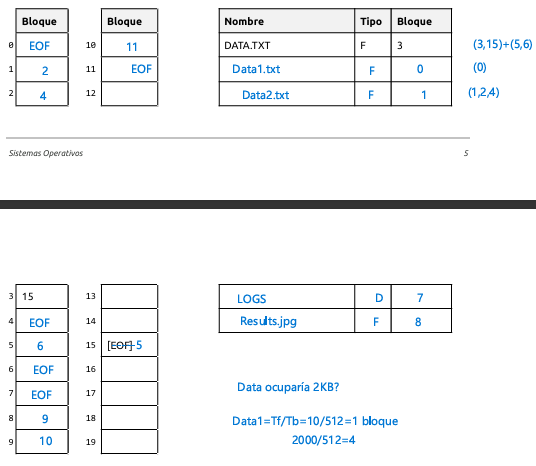

Ejercicio 12

Ejercicio 13

In [ ]:
//Terminal: Ejercicio 13 hoja 2: 
truncate --size 100M fs.ext2 // Reservar memoria para el inodo.
mkfs.ext2 fs.ext2 // para crear un sistema de ficheros que usa bloques indexados.
mkdir mnt // Creamos un directorio pater el SF.
sudo  mount -t ext2 -o loop ./fs.ext2 ./mnt/ 	// Para montar o desmontar se necesitan permisos de superusuario. Loop para
						// decirle que el SF esta dentro de otro SF.
echo 123456789 > small.txt // Creamos un archivo pequeñito.
dd if=/dev/random of=/big bs=024 count=520 // Un archivo grande. Del tamaño del bloque.
dd if=/dev/random of=/sparse bs=024 count=1 seek=51192 // Un archivo sparse.
// Para ver cosas del FS. No es el mismo stat que hemos usado hasta ahora. X es el numero de inodo que queramos ver. Y
// ponerle el FS que queremos ver.
debugfs -R "stat"<x> ../fs.ext2